In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import cufflinks as cf
import numpy as np
import pandas as pd

import folium
from urllib.request import urlopen
import matplotlib as mpl
import matplotlib.patches as mpatches
from folium import plugins

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
#pio.renderers.default = "svg"

In [6]:
baixas_all = pd.read_csv('dataframes/baixas_all.csv')
baixas_distrito = pd.read_csv('dataframes/baixas_distrito.csv')
df_layoff = pd.read_csv('dataframes/df_layoff.csv')
df_companies = pd.read_csv('dataframes/companies_gender_data.csv')
df_work = pd.read_csv('dataframes/df_work.csv')
df_size = pd.read_csv('dataframes/organization_dimension.csv')
df_region = pd.read_csv('dataframes/organization_region.csv')
despedimentos = pd.read_csv('dataframes/despedimentos_coletivos.csv')
historical_data_company = pd.read_csv('original_files/historical_data_company.csv')

### Nº de Baixas Por Isolamento

In [12]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=baixas_all['DATA'],y=baixas_all['POR DIA'],name='POR DIA', line=dict(color='crimson')))

fig.add_trace(go.Bar(x=baixas_all['DATA'],y=baixas_all['ACUMULADOS'],name='ACUMULADOS', marker_color='royalblue'))

fig.update_layout(title="Nº DE BAIXAS POR ISOLAMENTO",xaxis_title="DATA",yaxis_title="Nº Prestações Requeridas",)

fig.show()

In [4]:
baixas_distrito.drop([0,0], axis=0, inplace=True)

In [5]:
fig = go.Figure(go.Bar(x=baixas_distrito['TOTAL'],y=baixas_distrito['DISTRITO'],orientation='h'))

fig.update_layout(title='Nº DE BAIXAS POR ISOLAMENTO - POR DISTRITO ',template='plotly_white', 
                  xaxis_title="Prestações entradas por distrito",yaxis_title="Distrito",
                 yaxis={'categoryorder':'total ascending'})
fig.show()

### Lay Off - Estimativa

In [13]:
df_layoff['REMUNERAÇÕES DECLARADAS'] = df_layoff['REMUNERAÇÕES DECLARADAS'].astype(int)

In [78]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=df_layoff['DATA'], y=df_layoff['Nº TRABALHADORES'], name='Nº TRABALHADORES',
               mode='lines+markers'),
    row=1, col=1, 
)

fig.add_trace(
    go.Scatter(x=df_layoff['DATA'], y=df_layoff['REMUNERAÇÕES DECLARADAS'], name='Nº REMUNERAÇÕES DECLARADAS',
               mode='lines+markers'),
    row=1, col=2
)

fig.update_layout(height=600, width=1100, title_text="Lay Off - Estimativa",legend=dict(
        x=0.0,
        y=-0.2))
fig.show()

### Layoff – Estim. - CAE,Dim,Dist

3.1  Data Analysis by Work Sectors and Genders

In [11]:
df=pd.read_csv('original_files/historical_data_company.csv')
df=df.iloc[:,1:]
#df.set_index('Setor',inplace=True)
#df=df.stack().to_frame()
#df.index.set_names(['Setor','Data'],inplace=True)
#df.columns=['Total']
df_unpivoted = df.melt(id_vars=['Setor'], var_name='date', value_name='total')

In [109]:
df_unpivoted

,Setor,date,total
0,PESSOAS SINGULARES COM TRABALHADORES A CARGO,2020-04-17,4017
1,"Agricultura, produção animal, caça, floresta e...",2020-04-17,581
2,Indústrias extractivas,2020-04-17,42
3,Indústrias transformadoras,2020-04-17,7542
4,"Electricidade, gás, vapor, água quente e fria ...",2020-04-17,26
...,...,...,...
436,Educação,2020-06-16,2740
437,Actividades de saúde humana e apoio social,2020-06-16,7935
438,"Actividades artísticas, de espectáculos, despo...",2020-06-16,4557
439,Outras actividades de serviços,2020-06-16,5613


In [13]:
df = df_unpivoted
fig = px.bar(df, x="date", y="total", color='Setor',
             height=800,
             width=800,
             title='')
#fig.update_layout = dict(
            #title="",
            #xaxis = dict(
            #type="category", categoryorder="category ascending"),showlegend=True)

fig.update_layout(xaxis=dict(type="category", categoryorder="category ascending"))
#fig.update_yaxes(range=[50,160], secondary_y=False)
#fig.update_yaxes(range=[-10,200], secondary_y=True)


fig.show()

In [14]:
data = go.Figure(go.Bar(
            x=df_unpivoted['date'],
            y=df_unpivoted['total']))

#layout = dict(
            #title="timeline meal orders",
            #xaxis = dict(
            #type="category", categoryorder="category ascending"))

#fig = dict(data=data, layout=layout)
data.update_layout(xaxis=dict(type="category", categoryorder="category ascending"))
data.show()
#plot(fig)

In [20]:
#Calculate the proportion of the layoff by sector
df_setor=df_companies[['Setor','Nº NISS_EE']]
df_setor.reset_index()

#Calculate the percentage of sectors affected
total_setor=sum(df_setor['Nº NISS_EE'])
df_setor['Percentual(%)']=[(float(value) / total_setor) for value in df_setor['Nº NISS_EE']]
df_setor['Percentual(%)']=df_setor['Percentual(%)']*100
df_setor['Percentual(%)']=df_setor['Percentual(%)'].round()

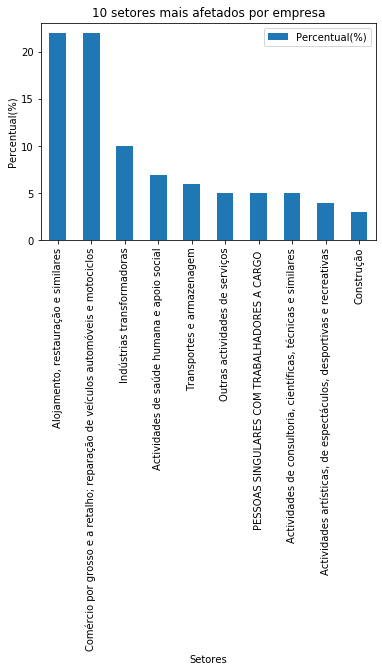

In [21]:
#present a bar chart of the 10 most affected sectors by companies
df_plot10=df_setor.head(10)
df_plot10.plot(kind='bar',x='Setor',y='Percentual(%)')
plt.title('10 setores mais afetados por empresa')
plt.xlabel('Setores')
plt.ylabel('Percentual(%)')
plt.show()

Text(0.5, 0, 'porcentagem total trabalhadores layoff(%)')

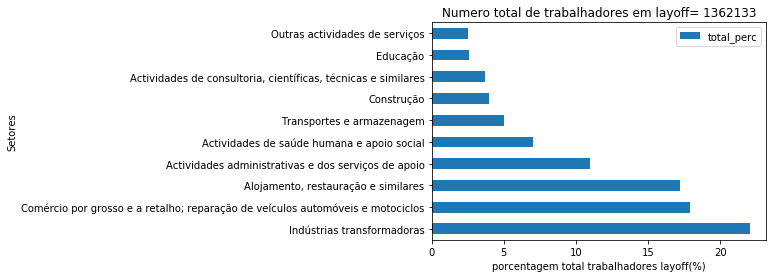

In [22]:
#data analysis by amount of workers
df_workers=df_work[['Setor','Nº TRABALHADORES','Feminino','Masculino']]
df_workers=df_workers.sort_values(by=['Nº TRABALHADORES'],ascending=False)

#Calculate percentage of total workers affected
total_worker=sum(df_workers['Nº TRABALHADORES'])
df_workers['total_perc']=[(float(value) / total_worker) for value in df_workers['Nº TRABALHADORES']]
df_workers['total_perc']=df_workers['total_perc']*100
df_workers['total_perc']=df_workers['total_perc'].round(3)
df_workers

#Calculate percentage of female workers affected
total_female=sum(df_workers['Feminino'])
df_workers['fem_perc']=[(float(value) / total_female) for value in df_workers['Feminino']]
df_workers['fem_perc']=df_workers['fem_perc']*100
df_workers['fem_perc']=df_workers['fem_perc'].round(3)
df_workers

#Calculate percentage of male workers affected
total_male=sum(df_workers['Masculino'])
df_workers['male_perc']=[(float(value) / total_male) for value in df_workers['Masculino']]
df_workers['male_perc']=df_workers['male_perc']*100
df_workers['male_perc']=df_workers['male_perc'].round(3)

#Rearrange colums
df_workers=df_workers[['Setor','Nº TRABALHADORES','total_perc','Feminino','fem_perc','Masculino','male_perc']]

#present a bar chart of the 10 industries that presented a higher amount of workers on layoff
df_work10=df_workers.head(10)
df_work10.plot(kind='barh',x='Setor',y='total_perc')
plt.title('Numero total de trabalhadores em layoff= '+str(total_worker))
plt.ylabel('Setores')
plt.xlabel('porcentagem total trabalhadores layoff(%)')
#plt.show()

In [23]:
#df = df_workers
#df.loc[df['Nº TRABALHADORES'] < 1.e1, 'Setor'] = 'Outros Setores'
df = df_workers.head(15)
fig = px.pie(df, values=df['Nº TRABALHADORES'], names=df['Setor'],
             title='% Trabalhadores Em Layoff - Por Setor (top10)',width=1100, height=500)
fig.update_traces(textposition='inside', textinfo='percent')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [24]:
trace = go.Pie(labels=df_workers.Setor, 
               values=df_workers['Nº TRABALHADORES'],
               textposition = "outside")

data = [trace]
layout = go.Layout(
    title='% Trabalhadores Em Layoff - Por Setor', 
    width=1100, height=800,
    legend=dict(orientation="h"))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

NameError: name 'iplot' is not defined

In [25]:
trace1 = go.Pie(labels=df_workers['Setor'], 
                    values=df_workers['Masculino'], 
                    name= "male", 
                    hole= .5, 
                    domain= {'x': [0, .48]})

trace2 = go.Pie(labels=df_workers['Setor'], 
                    values=df_workers['Feminino'], 
                    name="female", 
                    hole= .5,  
                    domain= {'x': [.52, 1]})

layout = dict(title= '% Trabalhadores Em Layoff - Por Setor/Sexo', width=1100, height=800,
              font=dict(size=10), legend=dict(orientation="h"),
                  annotations = [
                      dict(
                          x=.18, y=.5,
                          text='Masculino', 
                          showarrow=False,
                          font=dict(size=20)),
                      dict(
                          x=.81, y=.5,
                          text='Feminino', 
                          showarrow=False,
                          font=dict(size=20))])

fig = dict(data=[trace1, trace2], layout=layout)
iplot(fig)

NameError: name 'iplot' is not defined

Text(0.5, 0, 'Setores')

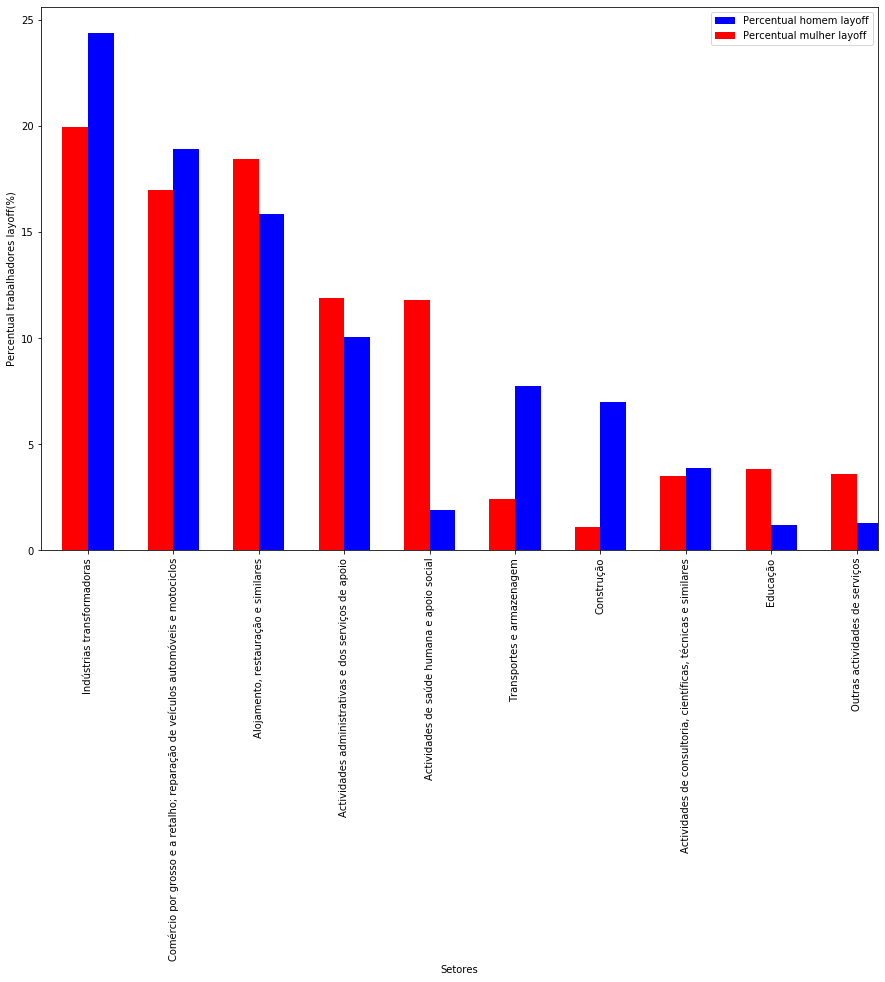

In [26]:
#Present a chart presenting  percentage of women and men layoff
#take men info
df_men=df_work10[['Setor','Masculino','male_perc']]
#take women info
df_women=df_work10[['Setor','Feminino','fem_perc']]

#Create bar chart
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes


width =0.3

df_men.plot(kind='bar',x='Setor', y='male_perc', color='blue', ax=ax, width=width, position=0,label='Percentual homem layoff',figsize=(15, 10))
df_women.plot(kind='bar',x='Setor', y='fem_perc', color='red', ax=ax, width=width, position=1,label='Percentual mulher layoff',figsize=(15, 10))

ax.set_ylabel('Percentual trabalhadores layoff(%)')
ax.set_xlabel('Setores')

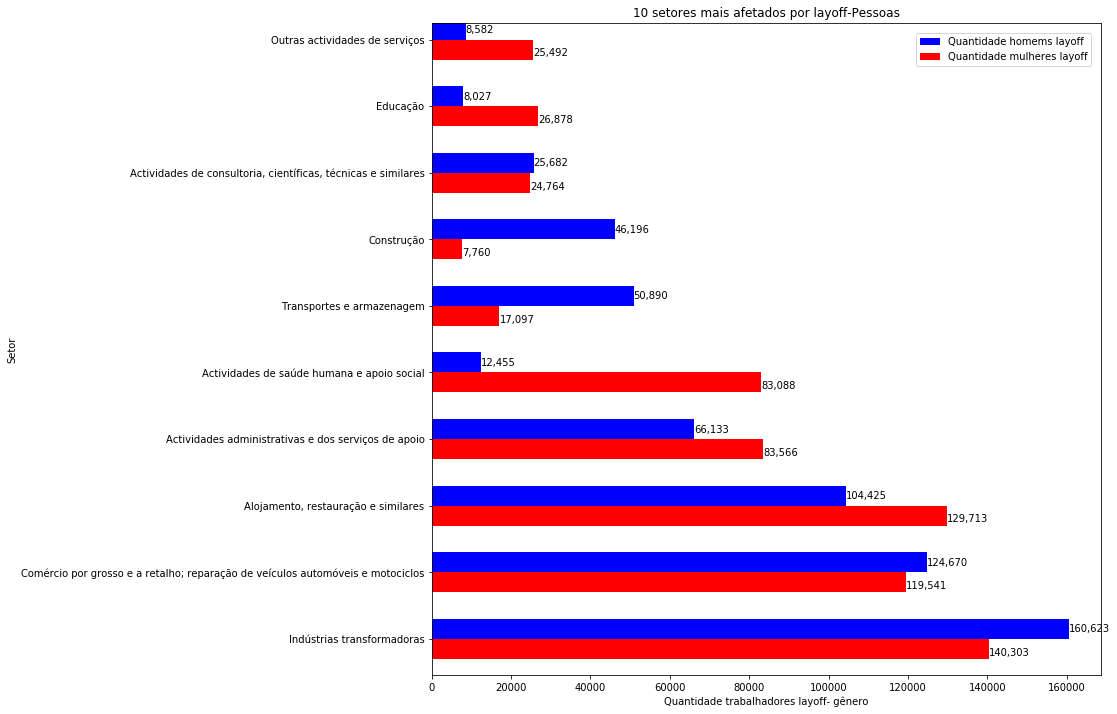

In [19]:
# Extract information relative to top 10 industries for men on layoff
df_label=df_men[['Setor','Masculino']]
df_label=df_label.reset_index()
df_label=df_label.set_index('Setor')
df_label_men=df_label['Masculino']

# Extract information relative to top 10 industries for women on layoff
df_label2=df_women[['Setor','Feminino']]
df_label2=df_label2.reset_index()
df_label2=df_label2.set_index('Setor')
df_label_women=df_label2['Feminino']

#Graphic with 10 most affected sectors 

plt.xlabel('Quantidade trabalhadores layoff- gênero')
plt.ylabel('Setor')
plt.title('10 setores mais afetados por layoff-Pessoas')

# Separation between bars
width =0.3

# print bar chart for men and women
df_label_men.plot(kind='barh', color='blue',  width=width, position=0,label='Percentagem homem layoff',figsize=(12, 12))
df_label_women.plot(kind='barh', color='red', width=width, position=1,label='Percentagem mulher layoff',figsize=(12, 12))

#print legend
gender=['Quantidade homems layoff','Quantidade mulheres layoff']

# annotate value labels to men (amount of unemployed)
for index, value in enumerate(df_label_men): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value, index + 0.1), color='black')

    # annotate value labels to women (amount of unemployed)
for index, value in enumerate(df_label_women): 
    label2 = format(int(value), ',') 
    plt.annotate(label2, xy=(value, index -0.25), color='black')

#present legends at top right corner
plt.legend(gender,bbox_to_anchor=(1, 1), loc=1, borderaxespad=1)
#show graph
#plt.show()

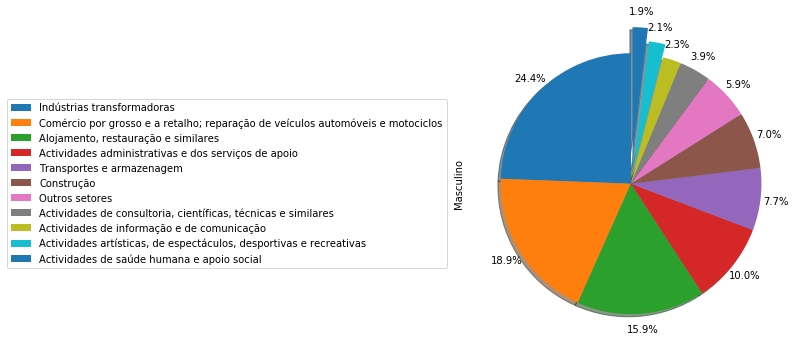

In [27]:
# Make a pie chart with the 10 most affected sectors, plus presenting an 11th sector with the sum of the other sectors affected
#For male situation
#Select the needed information
df_pie=df_workers[['Setor','Masculino']]
#sort values by the number of unemployed males
df_pie=df_pie.sort_values(by=['Masculino'],ascending=False)
#calculate the sum of the other sectors affected
outros_setores=sum(df_pie['Masculino'].tail(11))
#Make a new row with the sum of the rest of sectors affected
new_row=pd.Series(data={'Setor':'Outros setores','index':0,'Masculino':outros_setores})
#Append the new row to the existing information
df_pie=df_pie.append(new_row, ignore_index=True)
#sort values again by number of unemployed males
df_pie=df_pie.sort_values(by=['Masculino'],ascending=False)
#clean the data
df_pie=df_pie.reset_index()
df_pie=df_pie.set_index('Setor')
df_pie=df_pie.drop('index',1)
#select the data to plot and store it in a new dataframe, select the first 11 rows (10 sectors more affected + other sectors)
df_pie_men=df_pie['Masculino']
df_pie_top=df_pie_men.head(11)

#Generate the pie chart
#Generate and explode list to enhance visuals and present the information in a more clear way
explode_list = [0, 0, 0, 0, 0, 0,0,0,0,0.1,0.2] 

#present the pie chart using the dataframe created previously
df_pie_top.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            explode=explode_list
                            )
#Present legends for identification of different sectors
plt.legend(df_pie_top.index, loc='center right',bbox_to_anchor=(-0.55, 0, 0.5, 1))

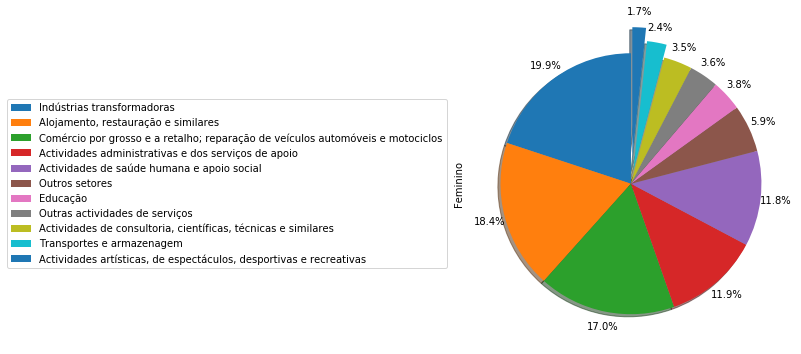

In [28]:
# Make a pie chart with the 10 most affected sectors, plus presenting an 11th sector with the sum of the other sectors affected
#For female situation
#Select the needed information
df_pie_f=df_workers[['Setor','Feminino']]
#sort values by the number of unemployed females
df_pie_f=df_pie_f.sort_values(by=['Feminino'],ascending=False)
#calculate the sum of the other sectors affected
outros_setores=sum(df_pie_f['Feminino'].tail(11))
#Make a new row with the sum of the rest of sectors affected
new_row=pd.Series(data={'Setor':'Outros setores','index':0,'Feminino':outros_setores})
#Append the new row to the existing information
df_pie_f=df_pie_f.append(new_row, ignore_index=True)
#sort values again by number of unemployed females
df_pie_f=df_pie_f.sort_values(by=['Feminino'],ascending=False)
#clean the data
df_pie_f=df_pie_f.reset_index()
df_pie_f=df_pie_f.set_index('Setor')
df_pie_f=df_pie_f.drop('index',1)
#select the data to plot and store it in a new dataframe, select the first 11 rows (10 sectors more affected + other sectors)
df_pie_women=df_pie_f['Feminino']
df_pie_top_w=df_pie_women.head(11)

#Generate the pie chart
#Generate and explode list to enhance visuals and present the information in a more clear way
explode_list = [0, 0, 0, 0, 0, 0,0,0,0,0.1,0.2] 

#present the pie chart using the dataframe created previously
df_pie_top_w.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            explode=explode_list
                            )
#Present legends for identification of different sectors
plt.legend(df_pie_top_w.index, loc='center right',bbox_to_anchor=(-0.55, 0, 0.5, 1))

3.2 Analysis by Organization dimension

In [29]:
#ANALYSIS BY ORGANIZATION DIMENSION

#Create a waffle chart to show distribution of affectance by oganization dimension
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_size.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )


In [30]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_size.index.values# categories
values = df_size['Percentual(%)'].round(3)# correponding values of categories

colormap = plt.cm.PRGn # color map class

In [31]:
create_waffle_chart(categories, values, height, width, colormap)

Total number of tiles is 400


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

3.3 Data Analysis By Region

In [32]:
#ANALYSIS BY REGION
import json

#import the Portugal Json file
with urlopen('https://raw.githubusercontent.com/deldersveld/topojson/master/countries/portugal/portugal-districts.json') as response:
    portugal_geo = json.load(response)

#Get latitude and longitude of Portugal
Portugalcoordinates=(39.399,-8.224)

#Divide into 2 sections, continental and islands
df_continental=df_region.iloc[0:18]
df_island=df_region.iloc[18:22]

df_continental['Latitude']=['40.644','38.015','41.503','41.805','39.823','40.205','38.566','37.019','40.537','39.744','38.716','39.291',
                         '41.149','39.135','38.524','41.644','41.295','40.657']
df_continental['Longitude']=['-8.6455','-7.865','-8.420','-6.757','-7.491','-8.419','-7.900','-7.932','-7.265','-8.807','-9.133',
                            '-7.432','-8.610','-8.405','-8.893','-8.830','-7.746','-7.914']
df_continental['Latitude']=df_continental['Latitude'].astype(float)
df_continental['Longitude']=df_continental['Longitude'].astype(float)
df_continental=df_continental.reset_index()
df_continental=df_continental.drop('index',1)
df_continental

,Region,N° Empresas,Percentual(%),Latitude,Longitude
0,Aveiro,7541.0,6.571105,40.644,-8.6455
1,Beja,1013.0,0.882712,38.015,-7.8650
2,Braga,10950.0,9.541652,41.503,-8.4200
3,Bragança,1253.0,1.091844,41.805,-6.7570
4,Castelo Branco,1509.0,1.314918,39.823,-7.4910
5,Coimbra,3901.0,3.399268,40.205,-8.4190
6,Évora,1360.0,1.185082,38.566,-7.9000
7,Faro,7179.0,6.255664,37.019,-7.9320
8,Guarda,1391.0,1.212095,40.537,-7.2650
9,Leiria,5300.0,4.618334,39.744,-8.8070


In [33]:
from folium import plugins
# creation of the choropleth
map2 = folium.Map(location=Portugalcoordinates, zoom_start=6)
map2.choropleth(geo_data = portugal_geo, 
                  name='choroplet',
                  data = df_continental,
                  columns = ['Region', 'N° Empresas'],
                  topojson='objects.PRT_adm1',
                  key_on = 'feature.properties.NAME_1',
                  fill_color = 'YlOrRd', 
              fill_opacity = 0.8, 
              line_opacity = 0.3,
              legend_name = 'count by district')

#create marker clusters
for i in range(df_continental.shape[0]): 
    location = [df_continental.Latitude[i],df_continental.Longitude[i]]
    tooltip  = "Region:{}<br>,Total Percent layoff Portugal (%): {}<br>, Total empresas layoff: {}<br> ".format(df_continental['Region'][i], 
                                                                                                     round(df_continental['Percentual(%)'][i],2),
                                                                                                     df_continental['N° Empresas'][i])

    folium.Marker(location,popup=tooltip).add_to(map2)



map2             
              
               

C:\Users\Ana\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [34]:
df_island=df_island.reset_index()

#Azores
df_azores=df_island.iloc[0:1]
df_azores['Latitude']=['37.794']
df_azores['Longitude']=['-25.506']

#import the Azores Json file
with urlopen('https://raw.githubusercontent.com/georgique/world-geojson/master/areas/portugal/azores.json') as response:
    azores_geo = json.load(response)

#Get latitude and longitude of Azores
Azorescoordinates=(37.794,-25.506)

# creation of the map
map3 = folium.Map(location=Azorescoordinates, zoom_start=6)

# instantiate a feature group for the incidents in the dataframe
feature = folium.map.FeatureGroup()



for lat, lng, in zip(df_azores.Latitude,df_azores.Longitude):
    feature.add_child(
        folium.CircleMarker(
            location=[lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
             fill_opacity=0.6))
    


#create marker clusters
for i in range(df_azores.shape[0]): 
    location = [df_azores.Latitude[i],df_azores.Longitude[i]]
    tooltip  = "Region: Azores,Total Percent layoff Portugal (%): {}<br>, Total empresas layoff: {}<br> ".format(round(df_azores['Percentual(%)'][i],2),
                                                                                                     df_azores['N° Empresas'][i])

    folium.Marker(location,popup=tooltip).add_to(map3)
    
#add incidents to map
map3


In [35]:
#Madeira
df_madeira=df_island.iloc[1:2]
df_madeira['Latitude']=['32.633']
df_madeira['Longitude']=['-16.900']
df_madeira=df_madeira.reset_index()
df_madeira=df_madeira.drop('index',1)

#import the Madeira Json file
with urlopen('https://raw.githubusercontent.com/georgique/world-geojson/master/areas/portugal/madeira.json') as response:
    madeira_geo = json.load(response)

#Get latitude and longitude of Azores
Madeiracoordinates=(32.633,-16.900)

# creation of the map
map4 = folium.Map(location=Madeiracoordinates, zoom_start=7)

# instantiate a feature group for the incidents in the dataframe
feature = folium.map.FeatureGroup()



for lat, lng, in zip(df_madeira.Latitude,df_azores.Longitude):
    feature.add_child(
        folium.CircleMarker(
            location=[lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
             fill_opacity=0.6))
    


#create marker clusters
for i in range(df_madeira.shape[0]): 
    location = [df_madeira.Latitude[i],df_madeira.Longitude[i]]
    tooltip  = "Region: Madeira,Total Percent layoff Portugal (%): {}<br>, Total empresas layoff: {}<br> ".format(round(df_madeira['Percentual(%)'][i],2),
                                                                                                     df_madeira['N° Empresas'][i])

    folium.Marker(location,popup=tooltip).add_to(map4)
    
#add incidents to map
map4


### Redução de Actividade TI e MOE

4.1 Redução de Atividade por Dia

In [36]:
red_byday=pd.read_csv('dataframes/reducao_atividade_porDia.csv') 

In [37]:
# Trabalhadores Independentes - Paragem Total 
df=red_byday[['DATA','TI_ParagemTotal']]
df['TI_ParagemTotal'] = df['TI_ParagemTotal'].cumsum()
df.set_index('DATA',inplace=True)
fig = go.Figure()
for col in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df[col].values,
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True
                             )
                 )
fig.update_layout(
title='Trabalhadores Independentes - Números de Pedidos para Paragem Total', xaxis_title="Data", yaxis_title="Valor acumulado")
fig.show()

In [38]:
# Trabalhadores Independentes - Redução Atividade 
df=red_byday[['DATA','TI_Reducao']]
df['TI_Reducao'] = df['TI_Reducao'].cumsum()
df.set_index('DATA',inplace=True)
df.dropna(inplace=True)
fig = go.Figure()
for col in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df[col].values,
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True
                             )
                 )
fig.update_layout(
title='Trabalhadores Independentes - Números de Pedidos para Redução de Atividade', xaxis_title="Data", yaxis_title="Valor acumulado")
fig.show()

4.2. Redução de Atividade por Distrito

In [39]:
red_bydistrict=pd.read_csv('dataframes/reducao_atividade_porDistrito_Total.csv')

In [40]:
df=red_bydistrict.iloc[1:]
df.columns=['Distritos','Prorrogação Membro Orgão Estatutário','Prorrogação Trabalhador Independente','Membro Orgão Estatutário','Trabalhador Independente']

fig = go.Figure(go.Bar(
            x=df['Trabalhador Independente'],
            y=df['Distritos'],
            orientation='h'))
fig.update_layout(
    title='Pedidos de Redução de Atividade por Distrito - Trabalhadores Independentes',
    template='plotly_white',
     xaxis_title="Pedidos",
    yaxis_title="Distrito",
    yaxis={'categoryorder':'total ascending'}
)
fig.show()

In [41]:
fig = go.Figure(go.Bar(
            x=df['Membro Orgão Estatutário'],
            y=df['Distritos'],
            orientation='h'))
fig.update_layout(
    title='Pedidos de Redução de Atividade por Distrito - Membro Orgão Estatutário',
    template='plotly_white',
     xaxis_title="Pedidos",
    yaxis_title="Distrito",
    yaxis={'categoryorder':'total ascending'}
)
fig.show()

4.3 Redução de Atividade por Sexo

In [42]:
reducao_atividade_bysex=pd.read_csv('dataframes/reducao_atividade_porSexo.csv')
red_bysex_aux=reducao_atividade_bysex[['TipoPedido','Feminino','Masculino']]
red_bysex_aux.loc[:,'TipoPedido']=['Trabalhador Independente','Prorrog. Trabalhador Independente','Membro Orgão Estatutário','Prorrog. Membro Orgão Estat.']
# red_bysex_aux=red_bysex_aux.melt('TipoPedido', var_name='Sexo', value_name='Numero Trabalhadores')
red_bysex_aux.set_index('TipoPedido',inplace=True)
labels=['Trabalhador Independente','Prorrog. Trabalhador Independente','Membro Orgão Estatutário','Prorrog. Membro Orgão Estat.']

fig = go.Figure(data=[
    go.Bar(name='Masculino', x=labels, y=red_bysex_aux['Masculino']),
    go.Bar(name='Feminino', x=labels, y=red_bysex_aux['Feminino'])
])
# Change the bar mode
fig.update_layout(barmode='group',
                  yaxis_title="Número de Pedidos",
                 title='Pedidos de Redução de Atividade por Sexo')
fig.show()


### Despedimentos coletivos

In [43]:
# Read csv
despedimentos=pd.read_csv('dataframes/despedimentos_coletivos.csv')

In [44]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# setup
init_notebook_mode(connected=True)
cf.set_config_file(theme='pearl')

# qtconsole for debugging
#%qtconsole --style vim #src# https://qtconsole.readthedocs.io/en/stable/

# Random data using cufflinks
df = despedimentos[['DATA','COLETIVOS_TOTAL','COLETIVOS_MICRO']]
df.columns=['DATA','Total','Micro Empresas']

fig = df.iplot(asFigure=True, kind='bar', barmode = 'overlay', x='DATA',
               xTitle='Data',yTitle='Valor acumulado ao longo do mês',title='Processos de despedimento coletivos')
# plot figure
iplot(fig)

In [45]:
# Random data using cufflinks
df = despedimentos[['DATA','TRABALHADORES_TOTAL','TRABALHADORES_MICRO']]
df.columns=['DATA','Total','Micro Empresas']

fig = df.iplot(asFigure=True, kind='bar',barmode = 'overlay', x='DATA',
               xTitle='Data',yTitle='Valor acumulado ao longo do mês',title='Trabalhadores a despedir')
# plot figure
iplot(fig)